# Visualização de dados

1. Métodos de plotagem *built-in* do `Pandas`
2. Um exemplo usando *seaborn*
3. Como aplicar estilos em *dataframes*.

In [12]:
# bibliotecas:
import pandas as pd

# dados:
clientes_cifraonline = pd.read_csv('clientes_cifraonline_limpo.csv')
clientes_cifraonline.head()

,nome,idade,genero,salario,cidade,status_emprego,formacao,score_credito,genero_cod,salario_anual,genero_cod_lambda,faixa_score
0,Mariano,65,M,7000.0,Porto Alegre,Autônomo,Pós-graduação,626,1,84000.0,1,Médio
1,Luiz,71,M,6545.0,Rio de Janeiro,Autônomo,Graduação,438,1,78540.0,1,Baixo
2,Carlo,21,M,12383.0,Salvador,Autônomo,Graduação,384,1,148596.0,1,Baixo
3,Luiz,77,M,1823.0,Porto Alegre,Autônomo,Ensino Médio,737,1,21876.0,1,Alto
4,Felipe,21,M,1490.0,Porto Alegre,Autônomo,Ensino Médio,482,1,17880.0,1,Baixo


### **1. Métodos *built-in***

> Scatter plot

<Axes: xlabel='idade', ylabel='salario'>

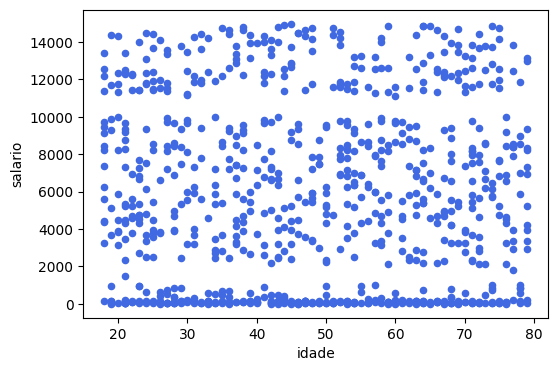

In [14]:
# idade e salário:
clientes_cifraonline.plot.scatter(x='idade', y='salario', color='royalblue', figsize=(6,4))

> Gráfico de barras

<Axes: >

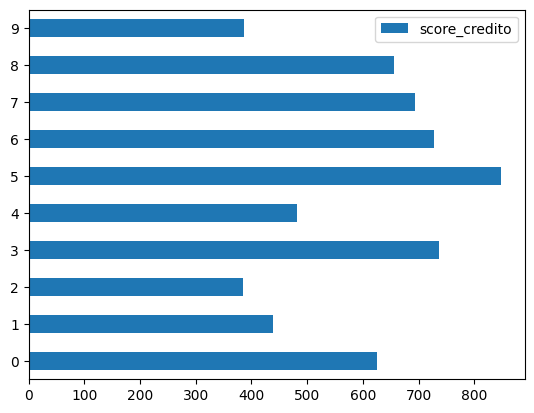

In [16]:
# score de crédito:
clientes_cifraonline[['score_credito']].head(10).plot.barh()

> Boxplot

<Axes: >

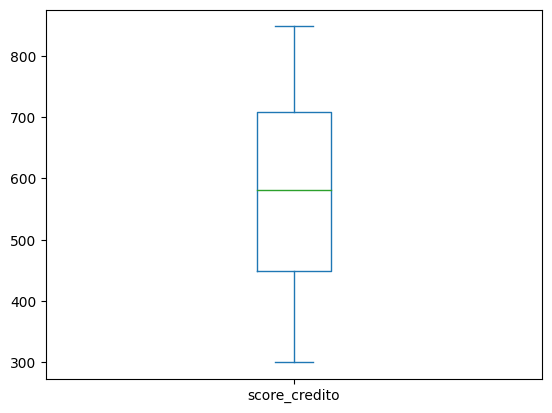

In [18]:
# score de crédito:
clientes_cifraonline[['score_credito']].plot.box()

Adicionalmente, podemos mudar a biblioteca por trás das plotagens (**backend**). Seguem algumas opções:

```python
pd.options.plotting.backend = 'matplotlib'    # (default)
pd.options.plotting.backend = 'plotly'
pd.options.plotting.backend = 'pandas_bokeh'
pd.options.plotting.backend = 'hvplot'
```

> Histograma com `plotly`

In [25]:
pd.options.plotting.backend = 'plotly'

# score de crédito:
clientes_cifraonline[['genero', 'score_credito']].hist(template='simple_white', color='genero', width=600, height=400)

> Boxplot com `plotly`

In [34]:
clientes_cifraonline[['status_emprego', 'score_credito']].boxplot(template='simple_white', color='status_emprego', width=600, height=400)

#### **2. Bibliotecas de visualização**

O Python conta com inúmeras bibliotecas de visualização. Alguns exemplos são:

1. Matplotlib
2. Seaborn (baseada em matplotlib)
3. Plotly
4. Bokeh



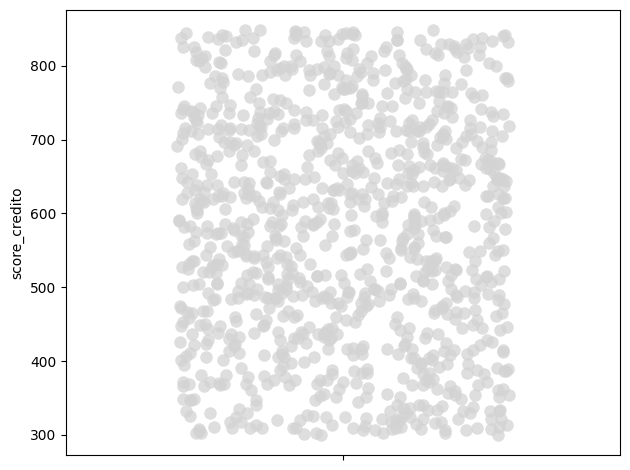

In [37]:
# bibliotecas:
import matplotlib.pyplot as plt
import seaborn as sns

# gráfico de stripplot (score):
fig, ax = plt.subplots()
sns.stripplot(
    data=clientes_cifraonline,
    y='score_credito',
    color='lightgray',
    size=9,
    alpha=0.75,
    jitter = 0.3
)
plt.tight_layout();


> **Quantos clientes tem o score de crédito acima de 700?**

In [47]:
# Regra de negócio:
clientes_cifraonline['score_700'] = clientes_cifraonline['score_credito'].apply(
    lambda score: 'Sim' if score >= 700 else 'Não'
)

# Contagem de clientes com score maior ou igual a 700:
contagem_clientes_score_700 = clientes_cifraonline['score_700'].value_counts() / len(clientes_cifraonline) * 100
percentual = round(contagem_clientes_score_700[1], 2)

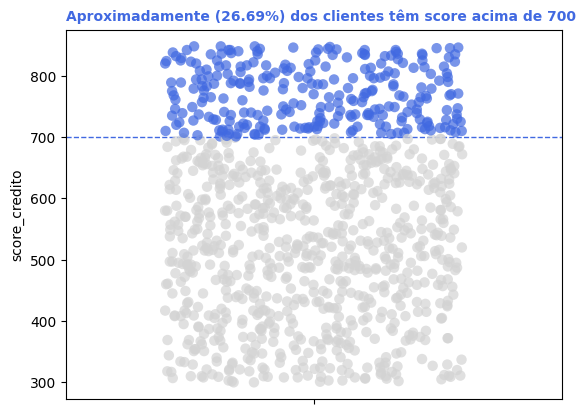

In [50]:
# Visualização de dados:
fig, ax = plt.subplots()
sns.stripplot(
    data=clientes_cifraonline,
     y='score_credito',
     hue='score_700',
     palette=['lightgray', 'royalblue'],
     size=7.5, alpha=0.7, jitter=0.3
)
plt.axhline(
    y=700, lw=1, ls='--',
    color='royalblue',
    label='Score 700'
)
plt.title(f'Aproximadamente ({percentual}%) dos clientes têm score acima de 700',
    weight='bold', color='royalblue', loc='left', size=10
);
plt.legend().remove();

### **3. Esitlos**

```python
dados.style.format(precision=2).<FORMATO>
```  

> `.background_gradient()`

In [52]:
clientes_cifraonline.head().style.format(precision=2).background_gradient()

,nome,idade,genero,salario,cidade,status_emprego,formacao,score_credito,genero_cod,salario_anual,genero_cod_lambda,faixa_score,score_700
0,Mariano,65,M,7000.00,Porto Alegre,Autônomo,Pós-graduação,626,1,84000.00,1,Médio,Não
1,Luiz,71,M,6545.00,Rio de Janeiro,Autônomo,Graduação,438,1,78540.00,1,Baixo,Não
2,Carlo,21,M,12383.00,Salvador,Autônomo,Graduação,384,1,148596.00,1,Baixo,Não
3,Luiz,77,M,1823.00,Porto Alegre,Autônomo,Ensino Médio,737,1,21876.00,1,Alto,Sim
4,Felipe,21,M,1490.00,Porto Alegre,Autônomo,Ensino Médio,482,1,17880.00,1,Baixo,Não


> `.bar()`

In [53]:
# geral (todo o dataframe):
clientes_cifraonline.head().style.format(precision=2).bar(color='chartreuse')

,nome,idade,genero,salario,cidade,status_emprego,formacao,score_credito,genero_cod,salario_anual,genero_cod_lambda,faixa_score,score_700
0,Mariano,65,M,7000.00,Porto Alegre,Autônomo,Pós-graduação,626,1,84000.00,1,Médio,Não
1,Luiz,71,M,6545.00,Rio de Janeiro,Autônomo,Graduação,438,1,78540.00,1,Baixo,Não
2,Carlo,21,M,12383.00,Salvador,Autônomo,Graduação,384,1,148596.00,1,Baixo,Não
3,Luiz,77,M,1823.00,Porto Alegre,Autônomo,Ensino Médio,737,1,21876.00,1,Alto,Sim
4,Felipe,21,M,1490.00,Porto Alegre,Autônomo,Ensino Médio,482,1,17880.00,1,Baixo,Não


In [54]:
# com subset:
clientes_cifraonline.head().style.format(precision=2).bar(subset='salario', color='chartreuse')

,nome,idade,genero,salario,cidade,status_emprego,formacao,score_credito,genero_cod,salario_anual,genero_cod_lambda,faixa_score,score_700
0,Mariano,65,M,7000.00,Porto Alegre,Autônomo,Pós-graduação,626,1,84000.00,1,Médio,Não
1,Luiz,71,M,6545.00,Rio de Janeiro,Autônomo,Graduação,438,1,78540.00,1,Baixo,Não
2,Carlo,21,M,12383.00,Salvador,Autônomo,Graduação,384,1,148596.00,1,Baixo,Não
3,Luiz,77,M,1823.00,Porto Alegre,Autônomo,Ensino Médio,737,1,21876.00,1,Alto,Sim
4,Felipe,21,M,1490.00,Porto Alegre,Autônomo,Ensino Médio,482,1,17880.00,1,Baixo,Não


> `.highlight_between()`

In [56]:
clientes_cifraonline.head().style.format(precision=2).highlight_between(subset='idade', left=60, right=75, color='orange')

,nome,idade,genero,salario,cidade,status_emprego,formacao,score_credito,genero_cod,salario_anual,genero_cod_lambda,faixa_score,score_700
0,Mariano,65,M,7000.00,Porto Alegre,Autônomo,Pós-graduação,626,1,84000.00,1,Médio,Não
1,Luiz,71,M,6545.00,Rio de Janeiro,Autônomo,Graduação,438,1,78540.00,1,Baixo,Não
2,Carlo,21,M,12383.00,Salvador,Autônomo,Graduação,384,1,148596.00,1,Baixo,Não
3,Luiz,77,M,1823.00,Porto Alegre,Autônomo,Ensino Médio,737,1,21876.00,1,Alto,Sim
4,Felipe,21,M,1490.00,Porto Alegre,Autônomo,Ensino Médio,482,1,17880.00,1,Baixo,Não


In [57]:
clientes_cifraonline.head().style.format(precision=2).highlight_between(subset='score_credito', left=700, right=1000, color='orange')

,nome,idade,genero,salario,cidade,status_emprego,formacao,score_credito,genero_cod,salario_anual,genero_cod_lambda,faixa_score,score_700
0,Mariano,65,M,7000.00,Porto Alegre,Autônomo,Pós-graduação,626,1,84000.00,1,Médio,Não
1,Luiz,71,M,6545.00,Rio de Janeiro,Autônomo,Graduação,438,1,78540.00,1,Baixo,Não
2,Carlo,21,M,12383.00,Salvador,Autônomo,Graduação,384,1,148596.00,1,Baixo,Não
3,Luiz,77,M,1823.00,Porto Alegre,Autônomo,Ensino Médio,737,1,21876.00,1,Alto,Sim
4,Felipe,21,M,1490.00,Porto Alegre,Autônomo,Ensino Médio,482,1,17880.00,1,Baixo,Não


> Combinando estilos:

```python
# Criando uma função definida:
def estilizar_dataframe(style):
    style.format(precision=2).<FORMATO 1>
    style.format(precision=2).<FORMATO 2>
    return style

# Aplicação:
dados.style.pipe(estilizar_dataframe)
```

In [60]:
# Função -- bar() em `salario`e background_graient() em idade:
def estilizar_dataframe(style):
    style.format(precision=2).background_gradient(subset='salario')
    style.format(precision=2).bar(subset='idade')
    return style

# Aplicação:
clientes_cifraonline.head(10).style.pipe(estilizar_dataframe)

,nome,idade,genero,salario,cidade,status_emprego,formacao,score_credito,genero_cod,salario_anual,genero_cod_lambda,faixa_score,score_700
0,Mariano,65,M,7000.00,Porto Alegre,Autônomo,Pós-graduação,626,1,84000.00,1,Médio,Não
1,Luiz,71,M,6545.00,Rio de Janeiro,Autônomo,Graduação,438,1,78540.00,1,Baixo,Não
2,Carlo,21,M,12383.00,Salvador,Autônomo,Graduação,384,1,148596.00,1,Baixo,Não
3,Luiz,77,M,1823.00,Porto Alegre,Autônomo,Ensino Médio,737,1,21876.00,1,Alto,Sim
4,Felipe,21,M,1490.00,Porto Alegre,Autônomo,Ensino Médio,482,1,17880.00,1,Baixo,Não
5,Ana,57,F,12548.00,São Paulo,Empregado,Graduação,848,0,150576.00,0,Alto,Sim
6,Paula,27,F,8432.00,São Paulo,Empregado,Graduação,728,0,101184.00,0,Alto,Sim
7,Paulo,37,M,13351.00,Belo Horizonte,Desempregado,Mestrado,693,1,160212.00,1,Médio,Não
8,Felipe,39,F,4978.00,Salvador,Autônomo,Graduação,656,0,59736.00,0,Médio,Não
9,Ano,68,M,7661.00,Belo Horizonte,Desempregado,Doutorado,387,1,91932.00,1,Baixo,Não
